# Software question - a)

In [3]:
import matplotlib.pyplot as plt
from sklearn import metrics, datasets, tree, cluster
from sklearn.model_selection import train_test_split
from sklearn.metrics import davies_bouldin_score
from sklearn.mixture import GaussianMixture

NUM_CLUSTERS = 3
METRIC = 'euclidean'

# (1.) load the data
data = datasets.load_wine()
X,y= data.data, data.target

# (2.1) k-means 
kmeans_algo = cluster.KMeans(n_clusters=NUM_CLUSTERS,algorithm='lloyd',init='random',n_init=1)

# learn the model
kmeans_model = kmeans_algo.fit(X)

# return centroids
kmeans_model.cluster_centers_
labels = kmeans_model.labels_
silhouette_kmeans = metrics.silhouette_score(X, labels, metric=METRIC)
print(f"silhouette (k-means): {silhouette_kmeans}")

# (2.2) EM clustering
# learn EM with multivariate Gaussian assumption (with 1 single run with starting point)
em_algo = GaussianMixture(n_components=NUM_CLUSTERS, covariance_type='full',n_init=1) 
em_model = em_algo.fit(X)

labels_em= em_model.predict(X)
silhouette_emclustering = metrics.silhouette_score(X, labels_em, metric=METRIC)
print(f"silhouette (EM clustering): {silhouette_emclustering}")

# 3. Comparing k-means with EM clustering (for wine dataset)
comparison_result = "k-means" if silhouette_kmeans > silhouette_emclustering else "EM clustering"
print(f"{comparison_result} is better!")

silhouette (k-means): 0.5711381937868838
silhouette (EM clustering): 0.283260460057237
k-means is better!


# Software question - b)

Components:
 [[ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
   1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
   6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
   9.99822937e-01]
 [ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
   9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
   5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
  -1.77738095e-02]
 [ 1.68738094e-02  1.22003373e-01  5.19874304e-02  9.38593003e-01
  -2.97802484e-02 -4.04846439e-02 -8.54433387e-02  1.35107797e-02
  -2.46593824e-02  2.91398464e-01 -2.59776624e-02 -7.03239693e-02
   4.52868159e-03]]


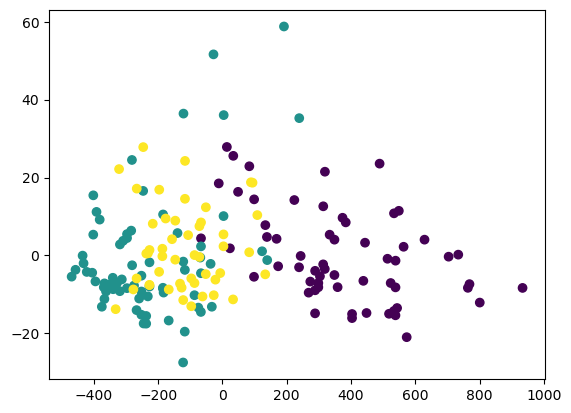

'\nThe values overlap, so the three classes cannot be separated \n(the variance is not sufficient to perform classification in this dataset).\n'

In [25]:
import matplotlib.pyplot as plt
from sklearn import metrics, datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

NUM_COMPONENTS = 3

# (1.) load the data
data = datasets.load_wine()
X,y= data.data, data.target

# (2.) learn the transformation (components as linear combination of features)
pca = PCA(n_components=NUM_COMPONENTS)
X_pca = pca.fit(X).transform(X)
print("Components:\n",pca.components_)

# (3.) Let's plot it!
plt.scatter(X_pca[:,0], X_pca[:,1],c=y)
plt.show()
'''
The values overlap, so the three classes cannot be separated 
(the variance is not sufficient to perform classification in this dataset).
'''

# Extra (3D representation)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y)
# plt.show()

# plt.scatter(X_pca[:,0], X_pca[:,1],c=y)
# plt.show()


# Software question - c)

silhouette (k-means): 0.5716547257508234


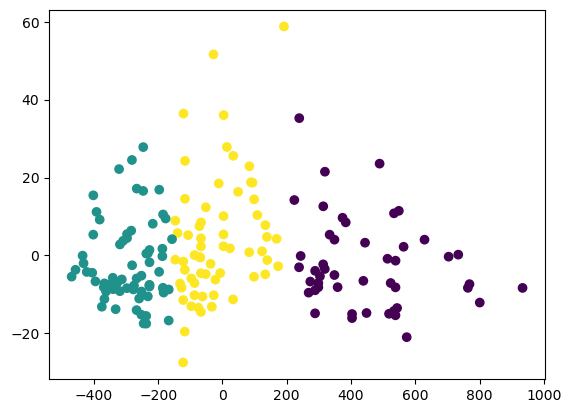

silhouette (EM clustering): 0.31434719457683


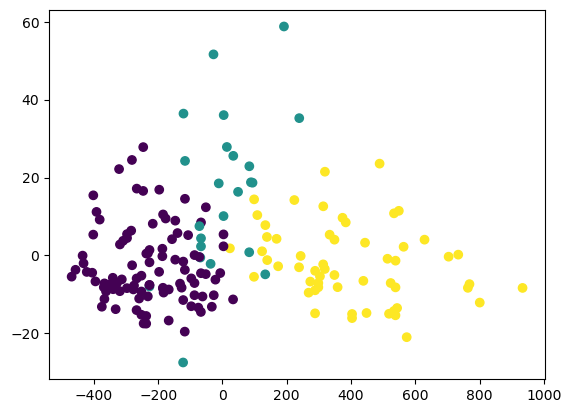

k-means is better!


"\nOLD output to consider - from a)\nsilhouette (k-means): 0.5711381937868838\nsilhouette (EM clustering): 0.31191976902584917\n\n\nThe hard assignment performed by k-means continues to be the best solution.\nNoteworthy, the shillouette values are lower than from a) because now the clusters\nare computed after the dimensionality reduction from PCA,\nbeing more consolidated and distant, and, consequently, better \n(this can be confirmed in the plots).\n\nExtra:\nk-means silhouette decreased while EM clustering's shillouette decreased because \n(1) EM clustering can overfit the dataset by fiting the variances and mixtures of weights. (confirmar Dúvida)\n(2) k-means can be more robust to outliers (not considering as relevant as EM clustering).\n(3) EM clustering struggles with data with high dimensionality (curse of Dimensionality)\n"

In [27]:
import matplotlib.pyplot as plt
from sklearn import datasets, cluster
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.mixture import GaussianMixture


NUM_COMPONENTS = 3
NUM_CLUSTERS = 3
METRIC = 'euclidean'

# (1.1) load the data
data = datasets.load_wine()
X,y= data.data, data.target

# (1.2) learn the transformation (components as linear combination of features)
pca = PCA(n_components=NUM_COMPONENTS)
X_pca = pca.fit(X).transform(X)
INPUT_DATASET = X_pca # using previous dataset

# (2.1) learning b) returned dataset (k-means)
kmeans_algo = cluster.KMeans(n_clusters=NUM_CLUSTERS,algorithm='lloyd',init='random',n_init=1)
kmeans_model = kmeans_algo.fit(INPUT_DATASET) # using returned dataset from PCA

kmeans_model.cluster_centers_
labels = kmeans_model.labels_
silhouette_kmeans = metrics.silhouette_score(INPUT_DATASET, labels, metric=METRIC)
print(f"silhouette (k-means): {silhouette_kmeans}")

plt.scatter(INPUT_DATASET[:,0], INPUT_DATASET[:,1],c=labels)
plt.show()

# (2.2) learning b) returned dataset (EM clustering)
em_algo = GaussianMixture(n_components=NUM_CLUSTERS, covariance_type='full',n_init=1) 
em_model = em_algo.fit(INPUT_DATASET)

labels_em= em_model.predict(INPUT_DATASET)
silhouette_emclustering = metrics.silhouette_score(INPUT_DATASET, labels_em, metric=METRIC)
print(f"silhouette (EM clustering): {silhouette_emclustering}")

# (3.) Scatter plot (EM clustering)
plt.scatter(INPUT_DATASET[:,0], INPUT_DATASET[:,1],c=labels_em)
plt.show()

# (3.) Comparing results (k-means VS EM clustering)
# 3. Comparing k-means with EM clustering (for wine dataset)
comparison_result = "k-means" if silhouette_kmeans > silhouette_emclustering else "EM clustering"
print(f"{comparison_result} is better!")


'''
OLD output to consider - from a)
silhouette (k-means): 0.5711381937868838
silhouette (EM clustering): 0.31191976902584917


The hard assignment performed by k-means continues to be the best solution.
Noteworthy, the shillouette values are lower than from a) because now the clusters
are computed after the dimensionality reduction from PCA,
being more consolidated and distant, and, consequently, better 
(this can be confirmed in the plots).

Extra:
k-means silhouette decreased while EM clustering's shillouette decreased because 
(1) EM clustering can overfit the dataset by fiting the variances and mixtures of weights. (confirmar Dúvida)
(2) k-means can be more robust to outliers (not considering as relevant as EM clustering).
(3) EM clustering struggles with data with high dimensionality (curse of Dimensionality)
'''

# Software question - d)

Silhouette (K-means): 0.6984195775999954


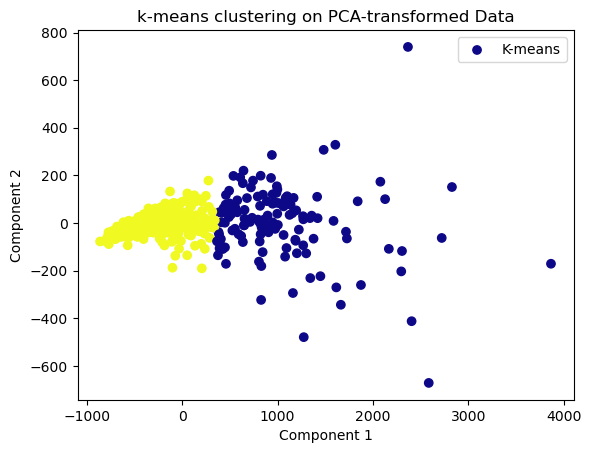

Silhouette (EM Clustering): 0.5865823748565955


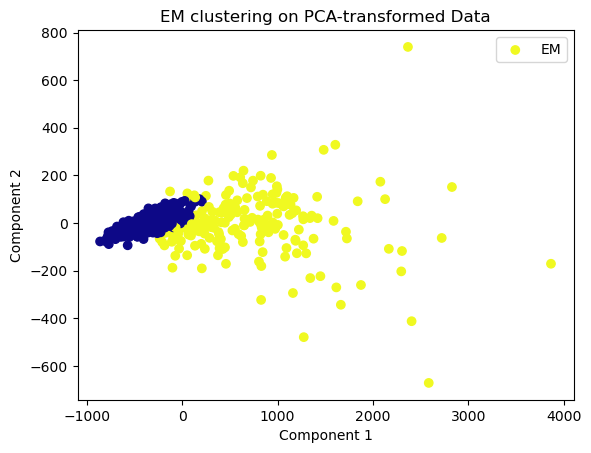

K-means is better based on silhouette score!


'\nk-means is better than EM clustering for this dataset too.\nHowever, PCA has the greatest value of silhouette, \nwith more dense and separated clusters (as can be seen in the third plot).\n'

In [1]:
import matplotlib.pyplot as plt
from sklearn import metrics, datasets, cluster
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# Flags to control the behaviours of the calculations
PCA_USED = False
NUM_CLUSTERS = 2
METRIC = 'euclidean'
NUM_COMPONENTS = 2

# Wrapper function (avoid repeated code)
def plot_data(input_data, c, title, label, PCA_USED):
    plt.scatter(input_data[:, 0], input_data[:, 1], c=c, cmap='plasma', marker='o', label=label)
    title += " on PCA-transformed Data" if PCA_USED else " without PCA"
    plt.title(title)
    if PCA_USED:
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
    plt.legend()
    plt.show()

# (1.1) load the data
data = datasets.load_breast_cancer()
X, y = data.data, data.target

if not PCA_USED:   # as untreated data
    INPUT_DATA = X
else:              # PCA Transformation
    pca = PCA(n_components=NUM_COMPONENTS)
    X_pca = pca.fit_transform(X)  # transformed data for consistent shape
    INPUT_DATA = X_pca

# (2.1) clustering (k-means) on PCA-transformed data
kmeans_algo = cluster.KMeans(n_clusters=NUM_CLUSTERS, algorithm='lloyd', init='random', n_init=1)
kmeans_model = kmeans_algo.fit(INPUT_DATA)
labels_kmeans = kmeans_model.labels_
silhouette_kmeans = metrics.silhouette_score(INPUT_DATA, labels_kmeans, metric=METRIC)
print(f"Silhouette (K-means): {silhouette_kmeans}")
plot_data(INPUT_DATA,labels_kmeans,'k-means clustering','K-means', PCA_USED)

# (2.2) EM Clustering on PCA-transformed data
em_algo = GaussianMixture(n_components=NUM_CLUSTERS, covariance_type='full', n_init=1)
em_model = em_algo.fit(INPUT_DATA)
labels_em = em_model.predict(INPUT_DATA)
silhouette_em = metrics.silhouette_score(X_pca, labels_em, metric=METRIC)
print(f"Silhouette (EM Clustering): {silhouette_em}")
plot_data(INPUT_DATA,labels_em,'EM clustering','EM', PCA_USED)

# (2.3) Comparing results (K-means vs EM Clustering)
comparison_result = "K-means" if silhouette_kmeans > silhouette_em else "EM Clustering"
print(f"{comparison_result} is better based on silhouette score!")


'''
PCA leads to better clusters (more choesive and separated, with better shillouettes)
by allowing a dimensionality reduction that specially benefits EM clustering
(due to its GMM not overfiting the small amount of data).
'''
#TODO confirm that Davies' measure is NOT needed here
